In [1]:
import sys

sys.path.insert(0, '..')

In [2]:
import shutil
import os 

_outs = './test_outputs'
if os.path.exists(_outs):
    shutil.rmtree(_outs)

In [3]:

import os

from biosimulator_processes.execute import exec_utc_comparison
from verification_service.worker.compare import generate_biosimulators_utc_comparison

Smoldyn is not properly installed in this environment and thus its process implementation cannot be registered. Please consult smoldyn documentation.
Cannot register SimpleNeuron. Error:
**
No module named 'pyneuroml'
**


In [4]:
omex_source_dir = './examples/sbml-core'
omex_name = "Vilar-PNAS-2002-minimal-circardian-clock.omex" # 'Elowitz-Nature-2000-Repressilator.omex'
omex_fp = os.path.join(omex_source_dir, omex_name)
out_dir = './test_outputs'
simulators = ['amici', 'copasi', 'tellurium']
spec_name = 'cI mRNA'

In [5]:
from verification_service.data_model import MongoDbConnector
from pymongo.mongo_client import MongoClient
from dotenv import load_dotenv
import os 

load_dotenv("../verification_service/.env")
uri = os.getenv("MONGO_DB_URI")
db_connector = MongoDbConnector(client=MongoClient(uri), database_id="service_requests")



In [6]:
db_connector.db

Database(MongoClient(host=['ac-pybqo7t-shard-00-01.sripiva.mongodb.net:27017', 'ac-pybqo7t-shard-00-00.sripiva.mongodb.net:27017', 'ac-pybqo7t-shard-00-02.sripiva.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', appname='verification-service', authsource='admin', replicaset='atlas-bdunmz-shard-0', tls=True), 'service_requests')

In [9]:
import uuid

jobid = str(uuid.uuid4())

pending_job_doc = db_connector.insert_pending_job(
    job_id=jobid,
    omex_path="./tmp/test-archive2.omex",
    simulators=["copasi", "amici"],
    comparison_id="comparison-test-7",
    timestamp=db_connector.timestamp()
)

In [10]:
pending_job_doc

{'job_id': '3addcb9e-627f-43ed-9b6b-d1ec60e57636',
 'status': 'PENDING',
 'omex_path': './tmp/test-archive2.omex',
 'simulators': ['copasi', 'amici'],
 'comparison_id': 'comparison-test-7',
 'timestamp': '2024-06-22 05:14:12.969308',
 'reports_path': 'null',
 '_id': ObjectId('66765da4928ac724109a006a')}

In [11]:
import uuid
jid = str(uuid.uuid4())
in_progress_job_doc = db_connector.insert_in_progress_job(job_id=jid, comparison_id=pending_job_doc['comparison_id'])

In [12]:
in_progress_job_doc

{'job_id': '4c695e3e-ed9f-4e6a-81c0-93fd5f2df89c',
 'status': 'IN_PROGRESS',
 'timestamp': '2024-06-22 05:14:18.455008',
 'comparison_id': 'comparison-test-7',
 '_id': ObjectId('66765daa928ac724109a006b')}

In [12]:
coll = db_connector.db['jobs']

result_doc = coll.find_one({'status': 'IN_PROGRESS'})

result_doc

{'_id': ObjectId('66765a91f1bb703d5b84ad34'),
 'job_id': 'bcd7c889-c09c-4270-8704-d93b9f123d13',
 'status': 'IN_PROGRESS',
 'timestamp': '2024-06-22 05:01:05.641102',
 'comparison_id': 'comparison-test-5'}

In [13]:
jid2 = str(uuid.uuid4())

complete_job_doc = db_connector.insert_completed_job(job_id=jid2, comparison_id=in_progress_job_doc['comparison_id'], results={'data': [1, 2, 3]})

In [14]:
complete_job_doc

{'job_id': 'ca257388-5bf4-45f5-bd8f-a9800f4b0f44',
 'status': 'COMPLETED',
 'timestamp': '2024-06-22 05:03:37.585438',
 'comparison_id': 'comparison-test-5',
 'results': {'data': [1, 2, 3]},
 '_id': ObjectId('66765b29f1bb703d5b84ad35')}

In [13]:
from types import NoneType

def scan_jobs(comparison_id, db_connector):
    coll = db_connector.db['jobs']
    status_decs = sorted(['COMPLETED', 'IN_PROGRESS', 'PENDING'])
    for status in status_decs:
        complete_job = coll.find_one({'status': status, 'comparison_id': comparison_id})
        if not isinstance(complete_job, NoneType):
            return complete_job
        else:
            print(f"Job not in {status}")


comparison_id = pending_job_doc['comparison_id']

job = scan_jobs(comparison_id, db_connector)

Job not in COMPLETED


In [14]:
job

{'_id': ObjectId('66765daa928ac724109a006b'),
 'job_id': '4c695e3e-ed9f-4e6a-81c0-93fd5f2df89c',
 'status': 'IN_PROGRESS',
 'timestamp': '2024-06-22 05:14:18.455008',
 'comparison_id': 'comparison-test-7'}

In [5]:
bigraph_comparison = exec_utc_comparison(
    omex_fp=os.path.join(omex_source_dir, 'Elowitz-Nature-2000-Repressilator.omex'), 
    simulators=simulators, 
    comparison_id="bigraph-vilar-comparison",
    include_outputs=False)

2024-06-20 11:28:12.277 - amici.sbml_import - INFO - Finished importing SBML                         (3.94E-02s)
2024-06-20 11:28:12.326 - amici.sbml_import - INFO - Finished processing SBML observables            (4.42E-02s)
2024-06-20 11:28:12.330 - amici.sbml_import - INFO - Finished processing SBML event observables      (8.34E-07s)
2024-06-20 11:28:12.352 - amici.de_model - INFO - Finished computing xdot                            (3.63E-03s)
2024-06-20 11:28:12.358 - amici.de_model - INFO - Finished computing x0                              (2.84E-03s)
2024-06-20 11:28:12.377 - amici.de_model - INFO - Finished computing w                               (1.56E-02s)
2024-06-20 11:28:13.044 - amici.de_export - INFO - Finished generating cpp code                      (6.61E-01s)
2024-06-20 11:28:22.197 - amici.de_export - INFO - Finished compiling cpp code                       (9.15E+00s)


In [6]:
bigraph_comparison

{'results': {'LacI protein': {'mse': {'amici': {'amici': 0.0,
     'copasi': 3421.101751414077,
     'tellurium': 1112642.3515076651},
    'copasi': {'amici': 3421.101751414077,
     'copasi': 0.0,
     'tellurium': 1122517.493697266},
    'tellurium': {'amici': 1112642.3515076651,
     'copasi': 1122517.493697266,
     'tellurium': 0.0}},
   'prox': {'amici': {'amici': True, 'copasi': False, 'tellurium': False},
    'copasi': {'amici': False, 'copasi': True, 'tellurium': False},
    'tellurium': {'amici': False, 'copasi': False, 'tellurium': True}}},
  'TetR protein': {'mse': {'amici': {'amici': 0.0,
     'copasi': 3432.245484968864,
     'tellurium': 1182387.32612705},
    'copasi': {'amici': 3432.245484968864,
     'copasi': 0.0,
     'tellurium': 1178485.6823350259},
    'tellurium': {'amici': 1182387.32612705,
     'copasi': 1178485.6823350259,
     'tellurium': 0.0}},
   'prox': {'amici': {'amici': True, 'copasi': False, 'tellurium': False},
    'copasi': {'amici': False, 'copasi

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

COMBINE/OMEX archive has warnings.
  - The manifest does not include its parent COMBINE/OMEX archive. Manifests should include their parent COMBINE/OMEX archives.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model

Archive contains 1 SED-ML documents with 4 models, 5 simulations, 5 tasks, 5 reports, and 5 plots:
  simulation.sedml:
    Tasks (5):
      tsk_0_0
      tsk_0_1
      tsk_0_3
      tsk_1_0
      tsk_1_1
    Reports (5):
      report_Euler_small_step_size: 10 data sets
      report_Fig_1_c: 10 data sets
      report_Fig_1a: 10 data sets
      report_low_delta_R_det: 10 data sets
      report_low_delta_R_stoch: 10 data sets
    Plots (5):
      plot2d_Euler_small_step_size: 9 curves
      plot2d_Fig_1_c: 9 curves
      plot2d_Fig_1a: 9 curves
      plot2d_low_delta_R_det: 9 curves
      plot2d_low_delta_R_stoch: 9 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 5 tasks and 10 outputs:
    Tasks:
      `tsk_0_0`
      `tsk_0_1`
      `tsk_0_3`
      `tsk_1_0`
      `tsk_1_1`
    Outputs:
      `plot2d_Euler_small_step_size`
      `plot2d_Fig_1_c`
      `plot2d_Fig_1a`
      `plot2d_low_delta_R_det`
      `plot2d_low_delta_R_stoch`
      `report_Euler_small_step_size`
      

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

- Variable `var_tsk_0_0_mRNA_R` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_0_0_R` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_0_0_PrmR_bound` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_0_0_PrmR` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_0_0_mRNA_A_` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_0_0_A` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_0_0_PrmA` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_0_0_C` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_0_0_PrmA_bound` has warnings.
  - XPath could not be validated.

2024-06-20 11:28:22.730 - amici.sbml_import - INFO - Finished loading SBML                           (1.15E-0

 succeeded
    Generating 10 outputs ...
      Generating output 1: `report_Fig_1a` ... succeeded
      Generating output 2: `report_low_delta_R_det` ... queued
      Generating output 3: `report_Euler_small_step_size` ... queued
      Generating output 4: `report_Fig_1_c` ... queued
      Generating output 5: `report_low_delta_R_stoch` ... queued
      Generating output 6: `plot2d_Fig_1a` ... succeeded
      Generating output 7: `plot2d_low_delta_R_det` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the X axis because the X data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/

 queued
      Generating output 8: `plot2d_Euler_small_step_size` ... queued
      Generating output 9: `plot2d_Fig_1_c` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the X axis because the X data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/

 queued
      Generating output 10: `plot2d_low_delta_R_stoch` ... queued
  Executing task 2: `tsk_0_1`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the X axis because the X data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/

 succeeded
    Generating 10 outputs ...
      Generating output 1: `report_Fig_1a` ... succeeded
      Generating output 2: `report_low_delta_R_det` ... succeeded
      Generating output 3: `report_Euler_small_step_size` ... queued
      Generating output 4: `report_Fig_1_c` ... queued
      Generating output 5: `report_low_delta_R_stoch` ... queued
      Generating output 6: `plot2d_Fig_1a` ... succeeded
      Generating output 7: `plot2d_low_delta_R_det` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'ANY'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtu

 succeeded
      Generating output 8: `plot2d_Euler_small_step_size` ... queued
      Generating output 9: `plot2d_Fig_1_c` ... queued
      Generating output 10: `plot2d_low_delta_R_stoch` ... queued
  Executing task 3: `tsk_0_3`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the X axis because the X data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/

 succeeded
    Generating 10 outputs ...
      Generating output 1: `report_Fig_1a` ... succeeded
      Generating output 2: `report_low_delta_R_det` ... succeeded
      Generating output 3: `report_Euler_small_step_size` ... succeeded
      Generating output 4: `report_Fig_1_c` ... queued
      Generating output 5: `report_low_delta_R_stoch` ... queued
      Generating output 6: `plot2d_Fig_1a` ... succeeded
      Generating output 7: `plot2d_low_delta_R_det` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.



 succeeded
      Generating output 8: `plot2d_Euler_small_step_size` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.



 succeeded
      Generating output 9: `plot2d_Fig_1_c` ... queued
      Generating output 10: `plot2d_low_delta_R_stoch` ... queued
  Executing task 4: `tsk_1_0`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the X axis because the X data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/

 succeeded
    Generating 10 outputs ...
      Generating output 1: `report_Fig_1a` ... succeeded
      Generating output 2: `report_low_delta_R_det` ... succeeded
      Generating output 3: `report_Euler_small_step_size` ... succeeded
      Generating output 4: `report_Fig_1_c` ... succeeded
      Generating output 5: `report_low_delta_R_stoch` ... queued
      Generating output 6: `plot2d_Fig_1a` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.



 succeeded
      Generating output 7: `plot2d_low_delta_R_det` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.



 succeeded
      Generating output 8: `plot2d_Euler_small_step_size` ... succeeded
      Generating output 9: `plot2d_Fig_1_c` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with th

 succeeded
      Generating output 10: `plot2d_low_delta_R_stoch` ... queued
  Executing task 5: `tsk_1_1`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the X axis because the X data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/

 succeeded
    Generating 10 outputs ...
      Generating output 1: `report_Fig_1a` ... succeeded
      Generating output 2: `report_low_delta_R_det` ... succeeded
      Generating output 3: `report_Euler_small_step_size` ... succeeded
      Generating output 4: `report_Fig_1_c` ... succeeded
      Generating output 5: `report_low_delta_R_stoch` ... succeeded
      Generating output 6: `plot2d_Fig_1a` ... succeeded
      Generating output 7: `plot2d_low_delta_R_det` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'Gibson-Bruck next reaction algorithm' (KISAO_0000027) at substitution policy 'ANY'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/viz/io.py:35: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis 

 succeeded
      Generating output 8: `plot2d_Euler_small_step_size` ... succeeded
      Generating output 9: `plot2d_Fig_1_c` ... succeeded
      Generating output 10: `plot2d_low_delta_R_stoch` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with th

 succeeded

Bundling outputs ...
Cleaning up ...
Group 'simulation.sedml/report' not found in the file.
Archive contains 1 SED-ML documents with 4 models, 5 simulations, 5 tasks, 5 reports, and 5 plots:
  simulation.sedml:
    Tasks (5):
      tsk_0_0
      tsk_0_1
      tsk_0_3
      tsk_1_0
      tsk_1_1
    Reports (5):
      report_Euler_small_step_size: 10 data sets
      report_Fig_1_c: 10 data sets
      report_Fig_1a: 10 data sets
      report_low_delta_R_det: 10 data sets
      report_low_delta_R_stoch: 10 data sets
    Plots (5):
      plot2d_Euler_small_step_size: 9 curves
      plot2d_Fig_1_c: 9 curves
      plot2d_Fig_1a: 9 curves
      plot2d_low_delta_R_det: 9 curves
      plot2d_low_delta_R_stoch: 9 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 5 tasks and 10 outputs:
    Tasks:
      `tsk_0_0`
      `tsk_0_1`
      `tsk_0_3`
      `tsk_1_0`
      `tsk_1_1`
    Outputs:
      `plot2d_Euler_small_step_size`
      `plot2d_Fig_1_c`
      `plot2d_Fig_1a`
   

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

- Variable `var_tsk_0_0_PrmR` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_0_0_C` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_0_0_mRNA_R` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_0_0_A` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_0_0_PrmA` has warnings.
  - XPath c

 queued
      Generating output 3: `report_Euler_small_step_size` ... queued
      Generating output 4: `report_Fig_1_c` ... queued
      Generating output 5: `report_low_delta_R_stoch` ... queued
      Generating output 6: `plot2d_Fig_1a` ... queued
      Generating output 7: `plot2d_low_delta_R_det` ... queued
      Generating output 8: `plot2d_Euler_small_step_size` ... queued
      Generating output 9: `plot2d_Fig_1_c` ... queued
      Generating output 10: `plot2d_low_delta_R_stoch` ... queued
  Executing task 3: `tsk_0_3`
    Executing simulation ... failed
    Generating 10 outputs ...
      Generating output 1: `report_Fig_1a` ... queued
      Generating output 2: `report_low_delta_R_det` ... queued
      Generating output 3: `report_Euler_small_step_size` ... queued
      Generating output 4: `report_Fig_1_c` ... queued
      Generating output 5: `report_low_delta_R_stoch` ... queued
      Generating output 6: `plot2d_Fig_1a` ... queued
      Generating output 7: `plot2d_low_d

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the X axis because the X data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

Curves have inconsistent x axis scales. All curves will be plotted in linear scale.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning

 queued
  Executing task 4: `tsk_1_0`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

- Variable `var_tsk_1_0_mRNA_A_` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_1_0_mRNA_R` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_1_0_PrmR` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_1_0_C` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_1_0_PrmA` has warnings.
  - XPath could not be validated.
- Variable `var_tsk_1_0_A` has warn

 succeeded
    Generating 10 outputs ...
      Generating output 1: `report_Fig_1a` ... queued
      Generating output 2: `report_low_delta_R_det` ... queued
      Generating output 3: `report_Euler_small_step_size` ... queued
      Generating output 4: `report_Fig_1_c` ... succeeded
      Generating output 5: `report_low_delta_R_stoch` ... queued
      Generating output 6: `plot2d_Fig_1a` ... queued
      Generating output 7: `plot2d_low_delta_R_det` ... queued
      Generating output 8: `plot2d_Euler_small_step_size` ... queued
      Generating output 9: `plot2d_Fig_1_c` ... succeeded
      Generating output 10: `plot2d_low_delta_R_stoch` ... queued
  Executing task 5: `tsk_1_1`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the X axis because the X data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

Curves have inconsistent x axis scales. All curves will be plotted in linear scale.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning

 succeeded
    Generating 10 outputs ...
      Generating output 1: `report_Fig_1a` ... queued
      Generating output 2: `report_low_delta_R_det` ... queued
      Generating output 3: `report_Euler_small_step_size` ... queued
      Generating output 4: `report_Fig_1_c` ... succeeded
      Generating output 5: `report_low_delta_R_stoch` ... succeeded
      Generating output 6: `plot2d_Fig_1a` ... queued
      Generating output 7: `plot2d_low_delta_R_det` ... queued
      Generating output 8: `plot2d_Euler_small_step_size` ... queued
      Generating output 9: `plot2d_Fig_1_c` ... succeeded
      Generating output 10: `plot2d_low_delta_R_stoch` ... succeeded

Bundling outputs ...
Cleaning up ...


/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the X axis because the X data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

Curves have inconsistent x axis scales. All curves will be plotted in linear scale.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning

CombineArchiveExecutionError: The COMBINE/OMEX did not execute successfully:

  The SED document did not execute successfully:
  
    Output handler could not be initialized:
    
      Simulation with algorithm KISAO_0000019 (N/A) failed:
      
        At least one reaction is reversible. That means stochastic simulation is not possible. 
        You can use "Tools|Convert to irreversible" which will split the reversible reactions 
         into two irreversible reactions. However you should check the kinetics afterwards.
  
    Output handler could not be initialized:
    
      Simulation with algorithm KISAO_0000019 (N/A) failed:
      
        At least one reaction is reversible. That means stochastic simulation is not possible. 
        You can use "Tools|Convert to irreversible" which will split the reversible reactions 
         into two irreversible reactions. However you should check the kinetics afterwards.
  
    Output handler could not be initialized:
    
      Simulation with algorithm KISAO_0000030 (N/A) failed:
      
        At least one reaction is reversible. That means stochastic simulation is not possible. 
        You can use "Tools|Convert to irreversible" which will split the reversible reactions 
         into two irreversible reactions. However you should check the kinetics afterwards.

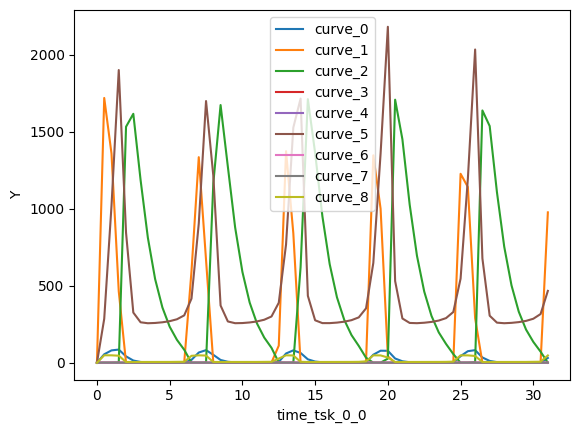

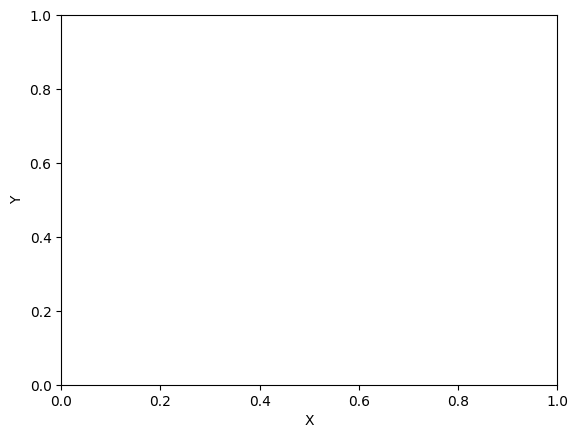

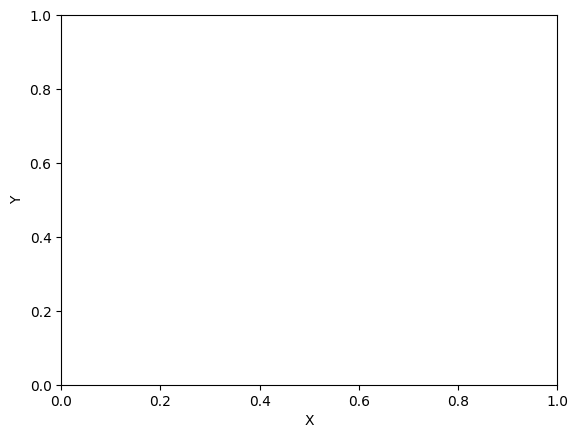

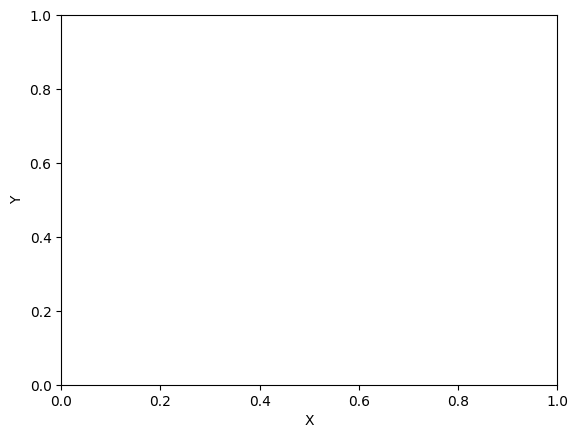

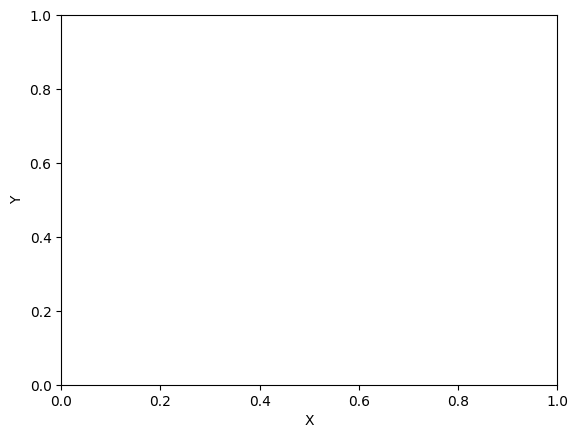

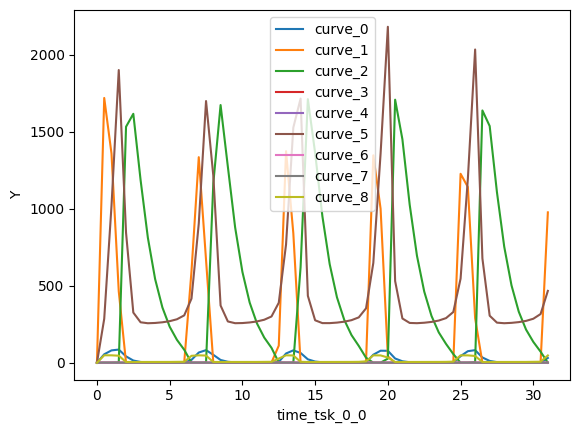

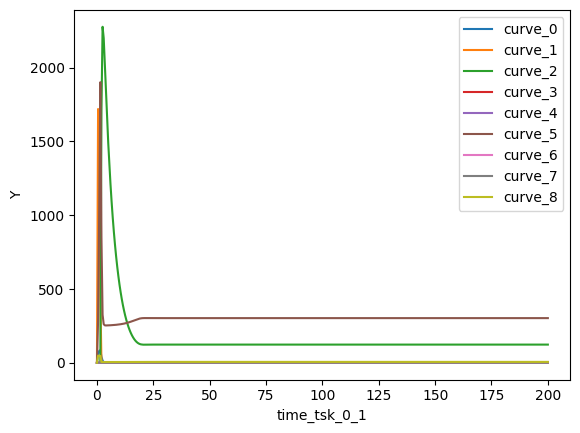

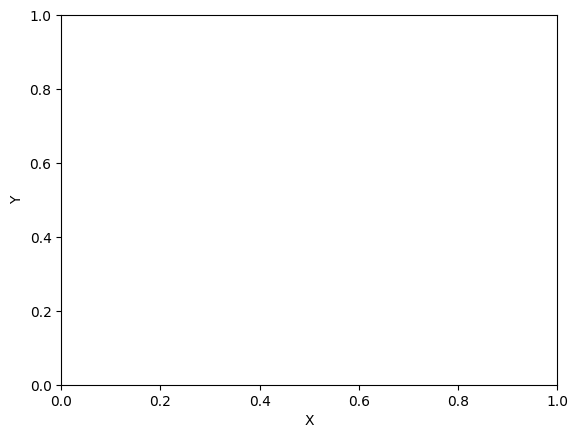

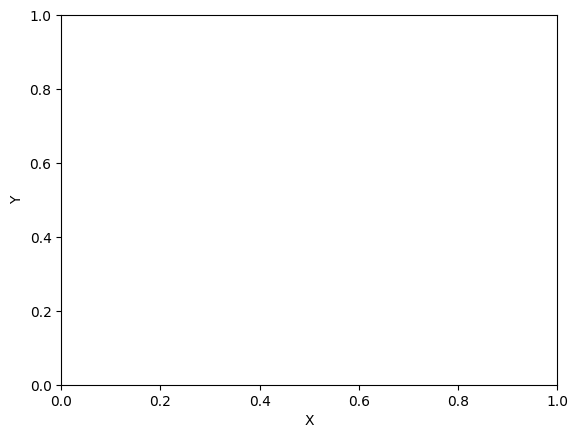

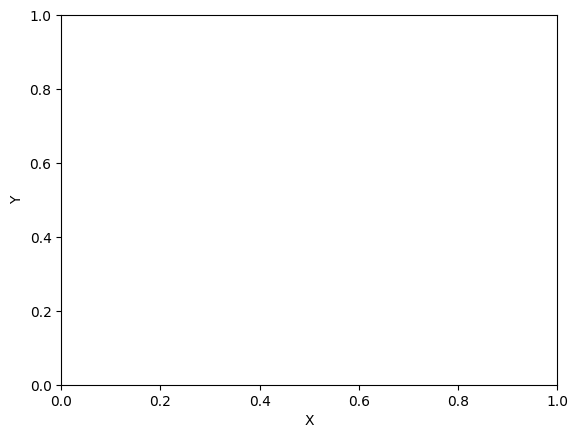

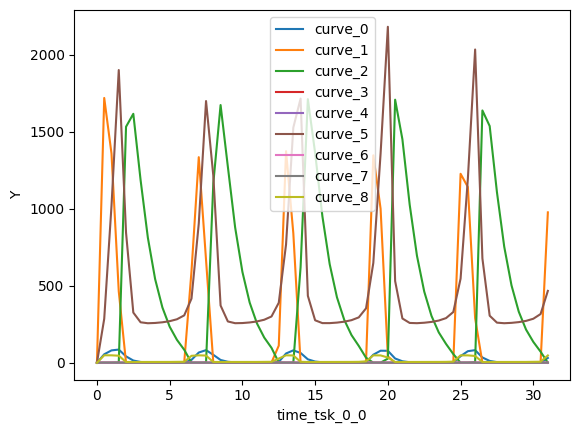

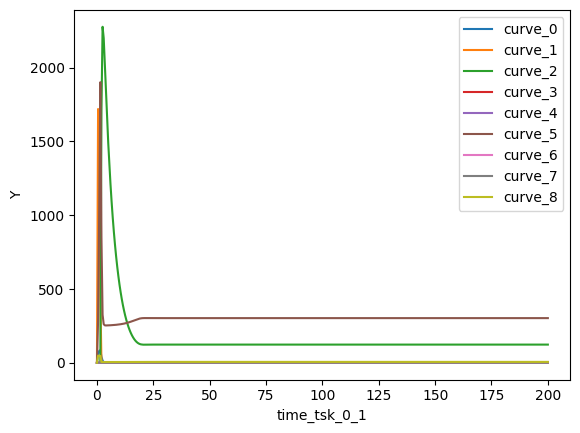

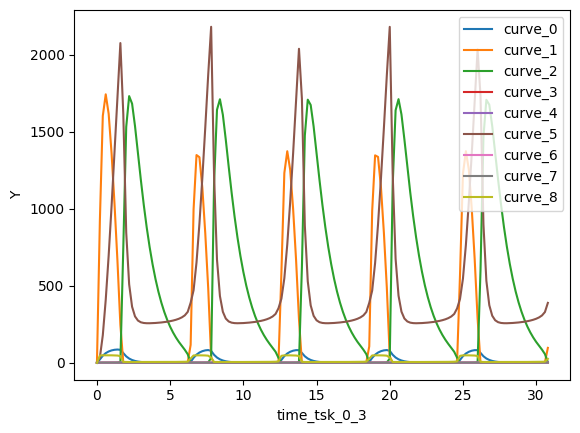

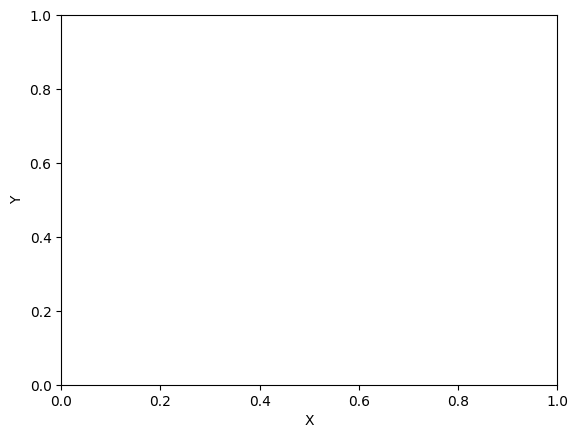

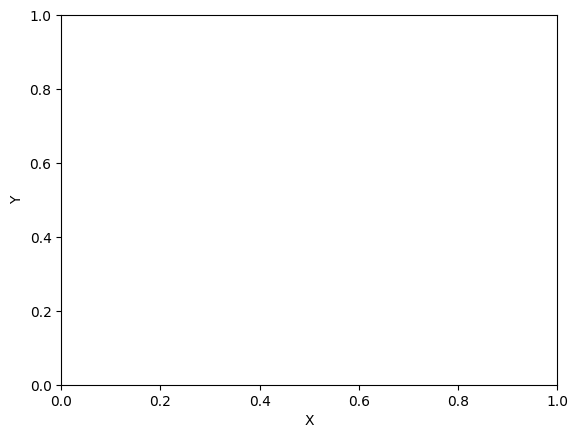

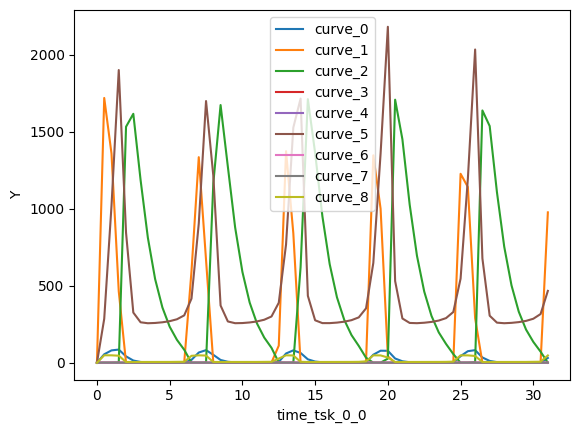

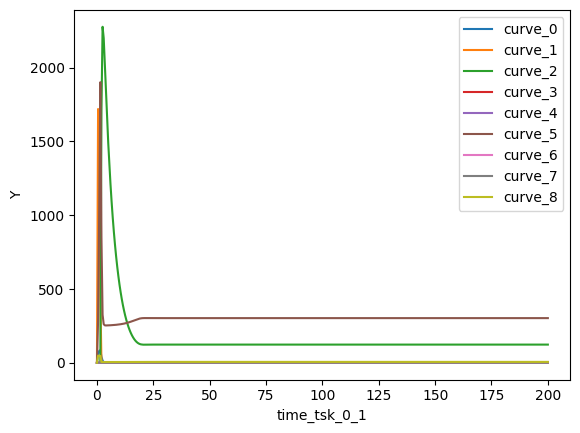

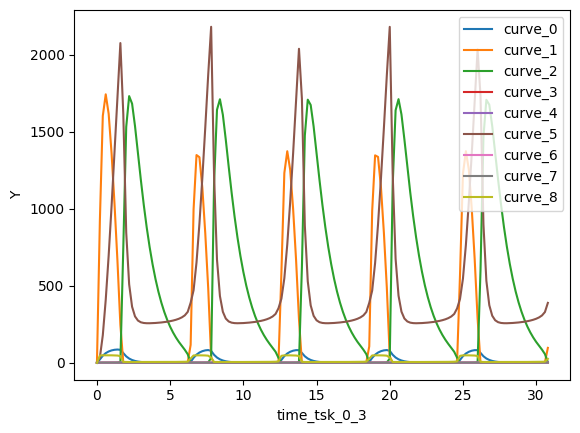

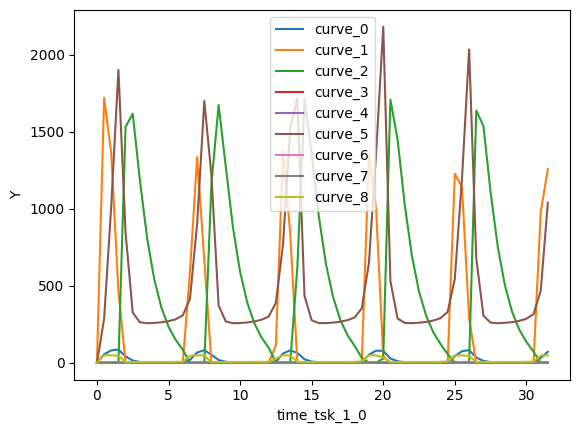

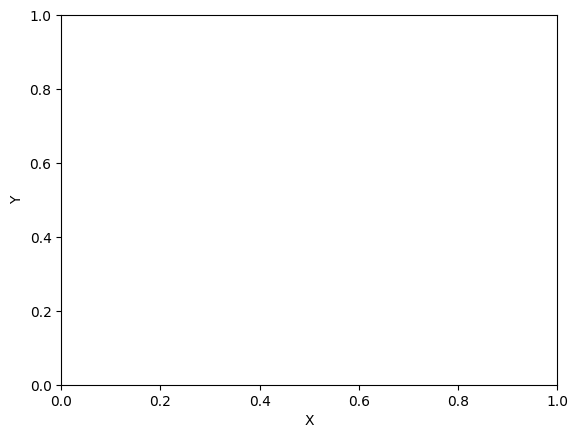

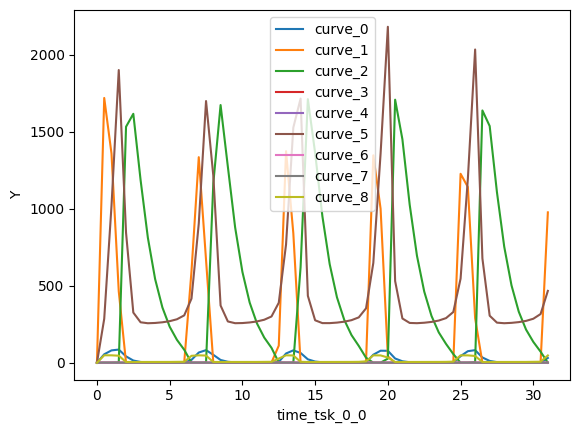

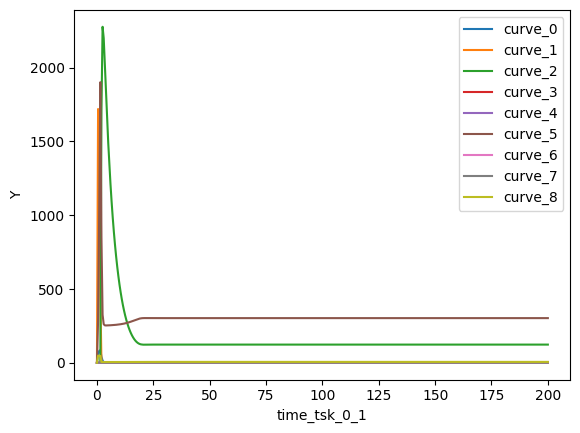

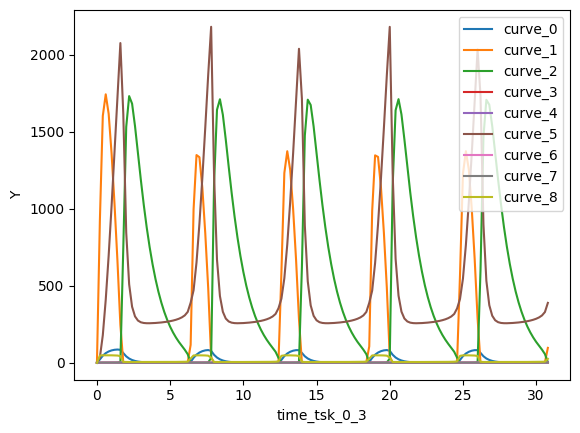

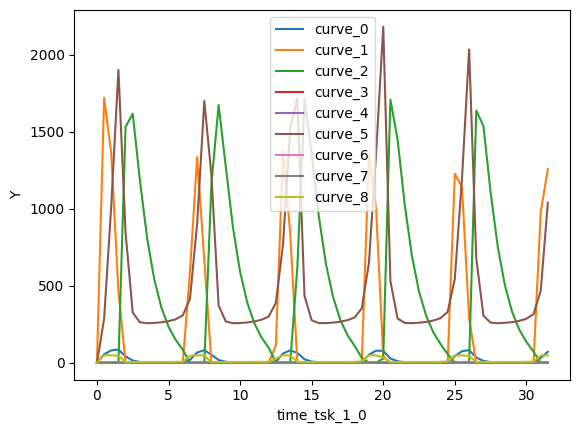

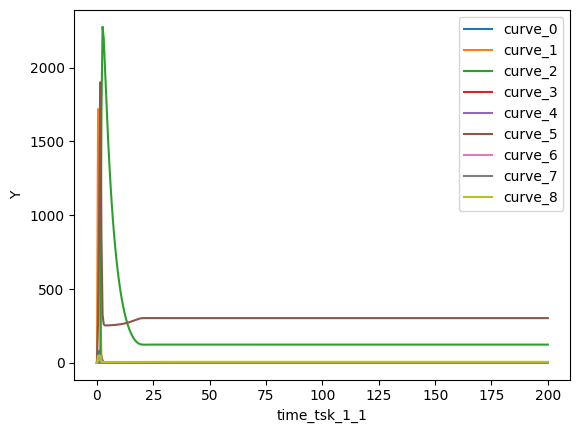

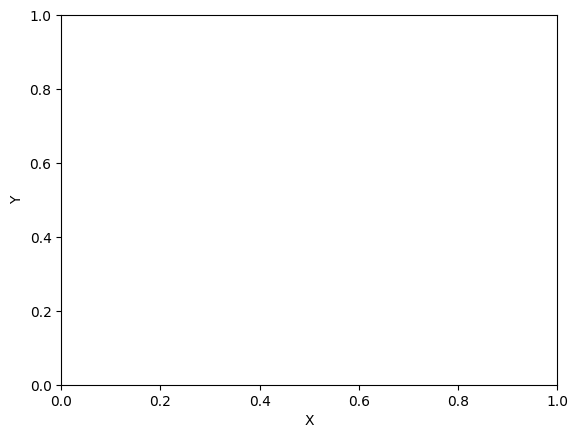

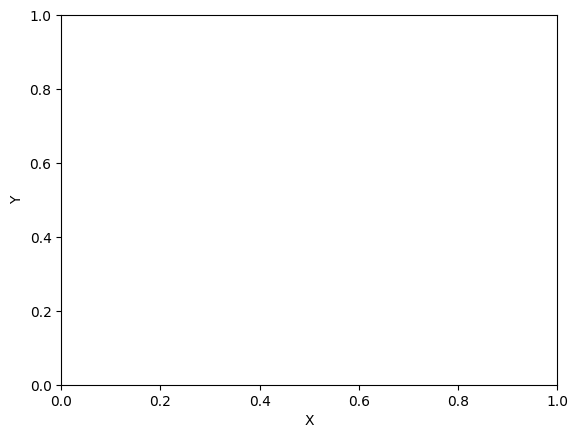

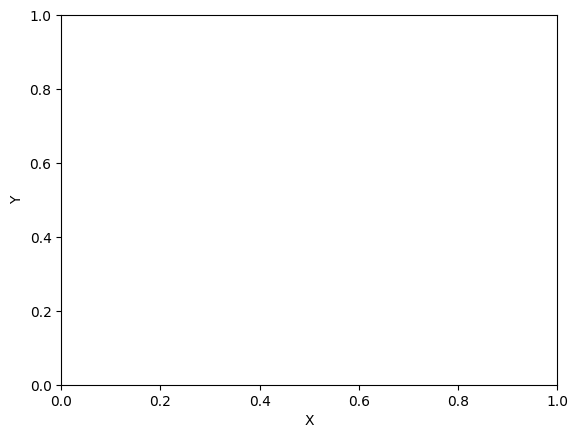

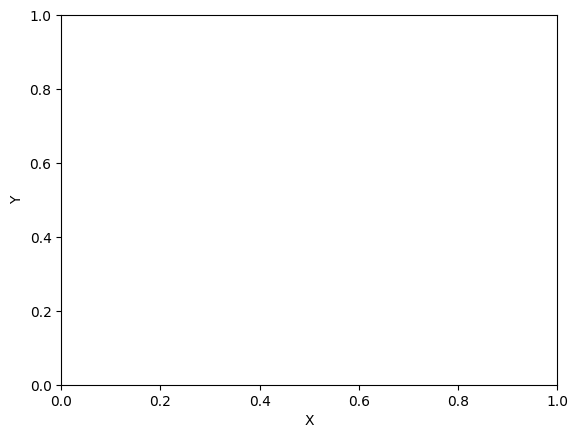

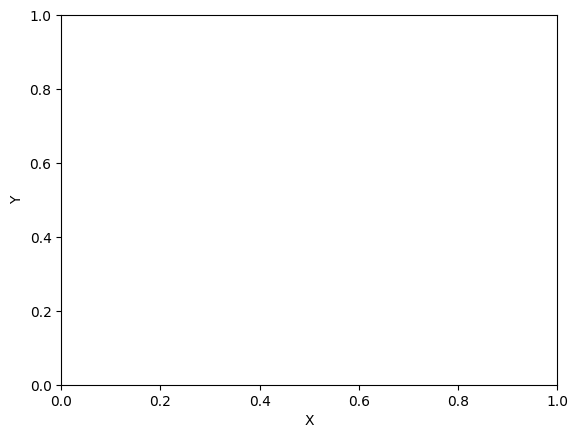

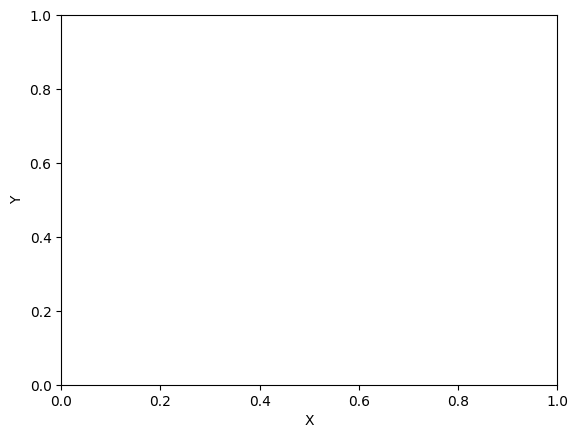

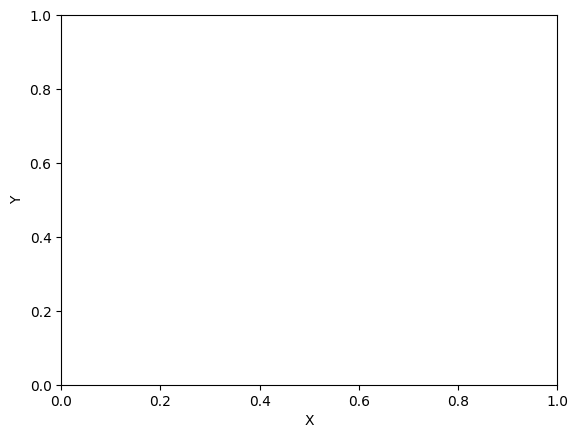

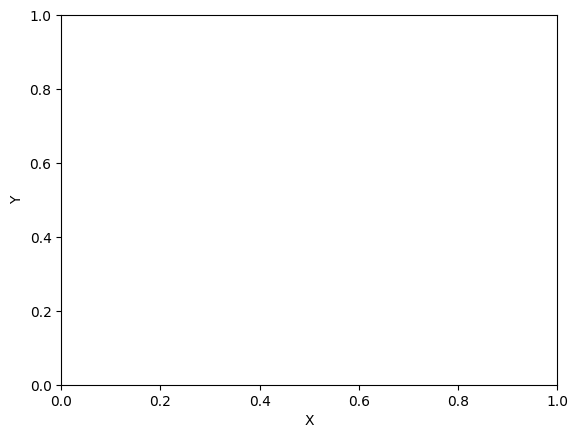

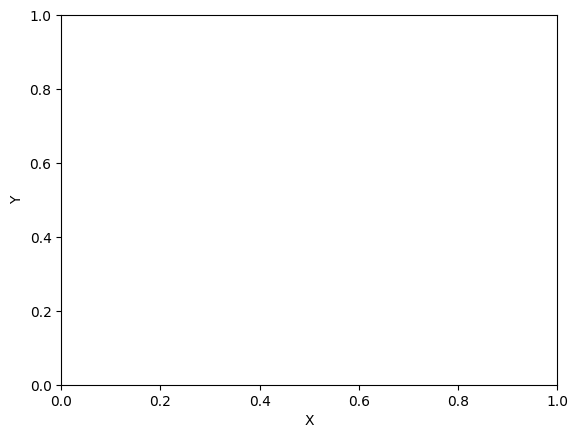

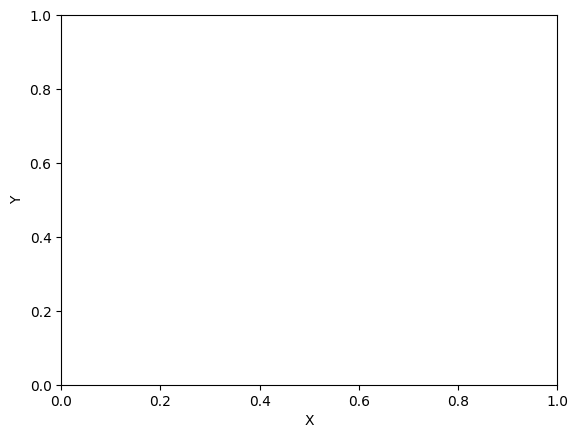

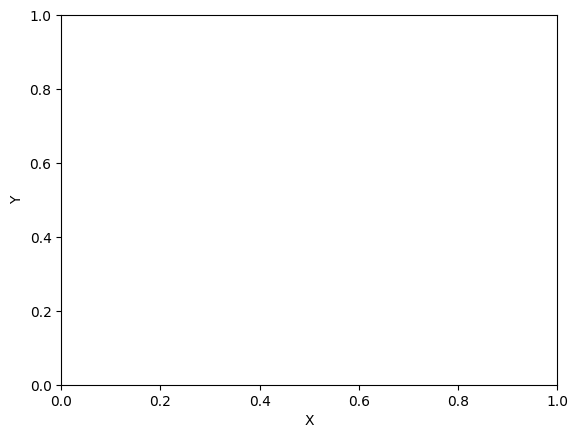

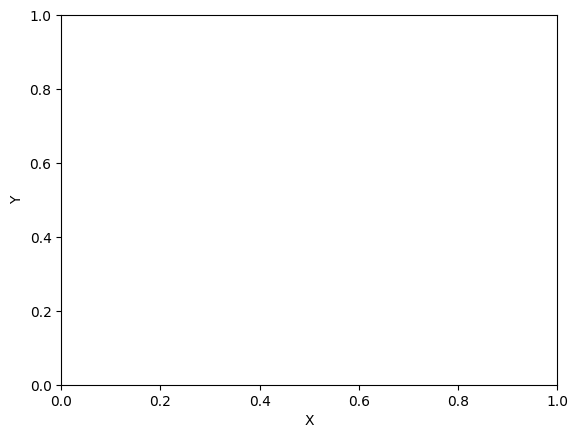

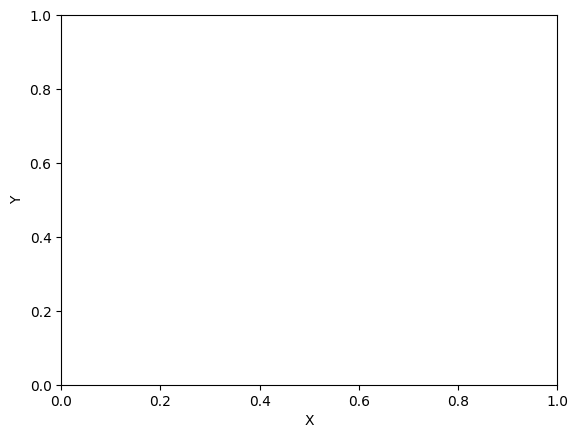

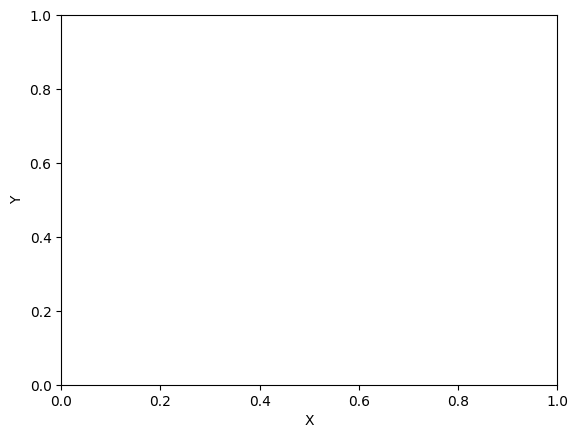

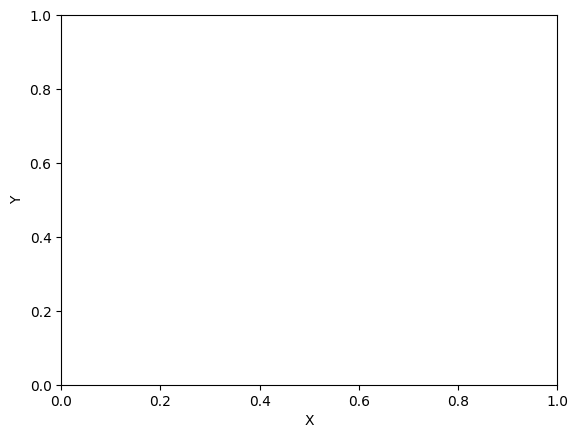

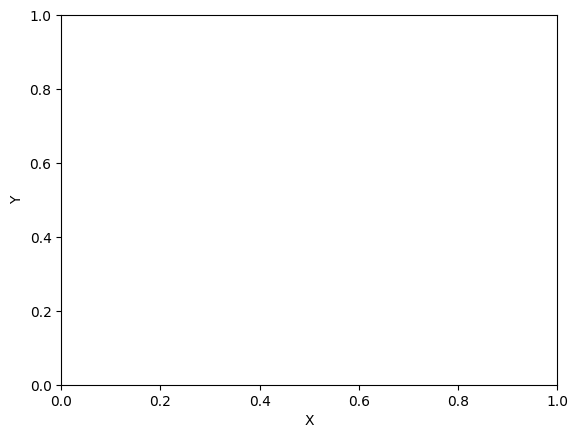

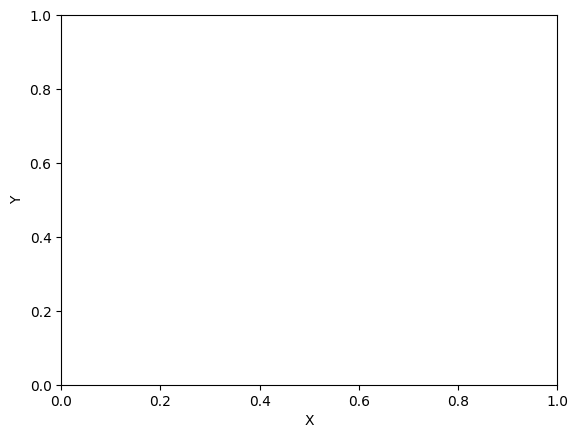

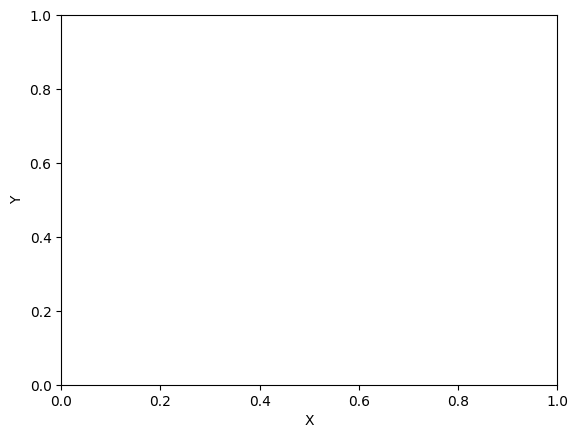

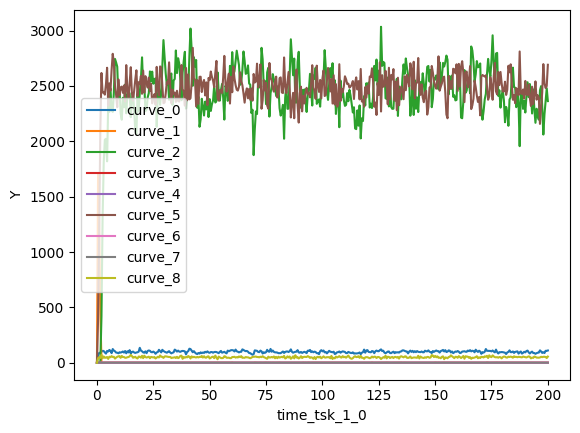

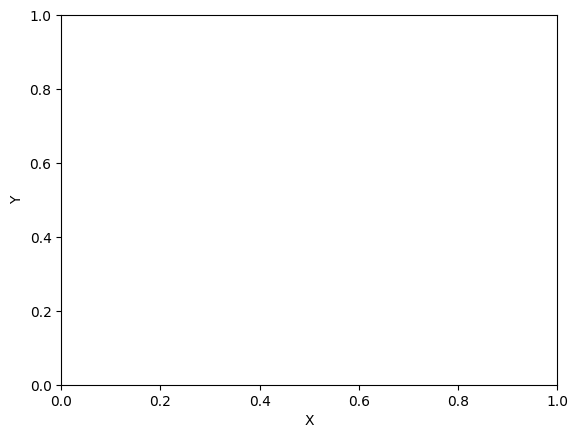

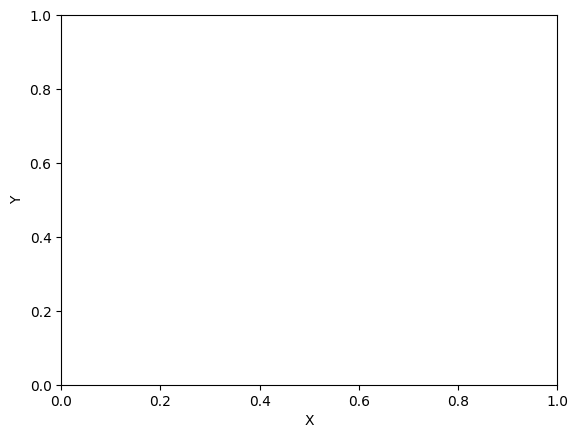

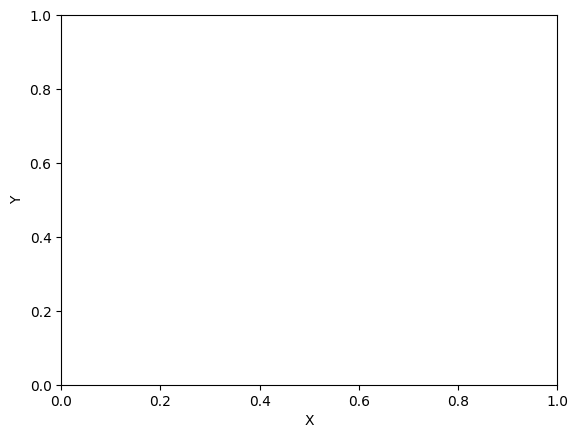

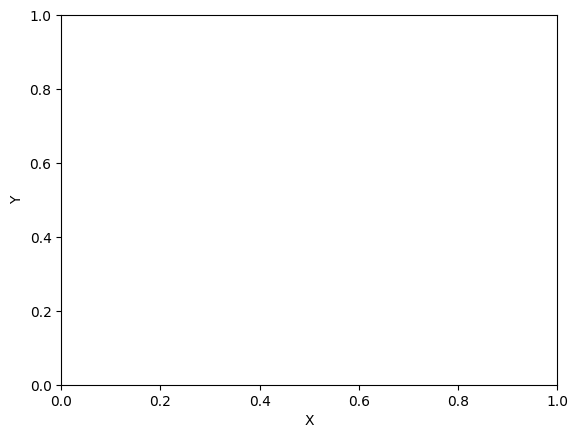

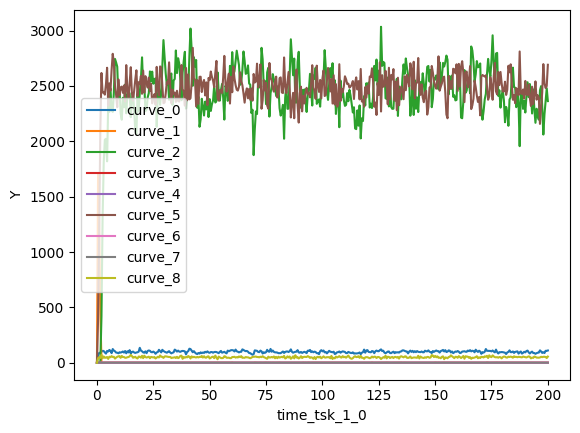

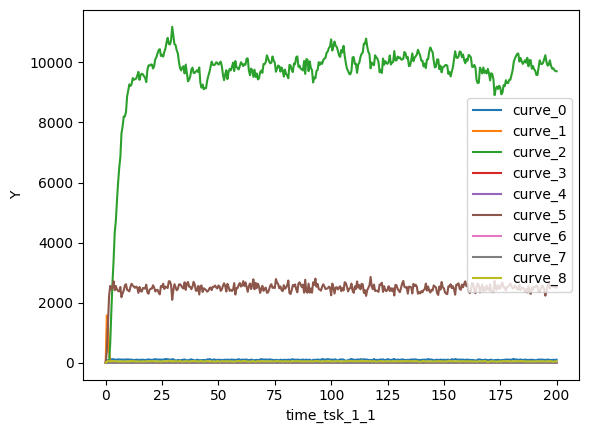

In [7]:
biosim_comparison = await generate_biosimulators_utc_comparison(
    omex_fp=omex_fp, simulators=simulators, comparison_id="bigraph-comparison", out_dir=out_dir)

In [ ]:
biosim_comparison

In [60]:
algs = check_ode_kisao_term('KISAO_0000019')

In [61]:
ode_ids = [term.id for term in list(utils.get_ode_algorithms())]

ode_ids[0].endswith('KISAO_0000536')

True

In [62]:
"KISAO" in algs[1].id

TypeError: 'bool' object is not subscriptable

In [63]:
algs

True

In [32]:
algs[1].objects()

TypeError: Term.objects() missing 1 required positional argument: 'r'

In [33]:
sbml_file = '/Users/alexanderpatrie/Desktop/repos/bio-assist/knowledge/ai-gen-sbml/ai_gen_repressilator.xml'

In [34]:
from biosimulator_processes.processes.copasi_process import UtcCopasi

Smoldyn is not properly installed in this environment and thus its process implementation cannot be registered. Please consult smoldyn documentation.
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra-process',
  'copasi-process',
  'tellurium-process',
  'utc-amici',
  'utc-copasi',
  'utc-tellurium',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d',
  'utc-comparator']


In [41]:
from biosimulator_processes import CORE 

dur = 100
nsteps = 1000
step_size = 0.42
copasi = UtcCopasi(
    config={
        'model': {'model_source': sbml_file}, 
        'method': 'stochastic',
        'time_config': {
            'duration': dur, 'num_steps': nsteps, 'step_size': step_size}
        }, 
    core=CORE)

IndexError: list index out of range

In [37]:
from basico import * 

m = load_model(sbml_file)

specs = get_species(model=m)

In [38]:
specs


,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id,transition_time,display_name
name,,,,,,,,,,,,,,,
TetR,cell,reactions,mol/l,0.0,0.0,,,0.0,0.0,0.0,0.0,Metabolite_12,TetR,NaN,TetR
LacI,cell,reactions,mol/l,0.0,0.0,,,0.0,0.0,0.0,0.0,Metabolite_13,LacI,NaN,LacI
cI,cell,reactions,mol/l,0.0,0.0,,,0.0,0.0,0.0,0.0,Metabolite_14,cI,NaN,cI
mRNA_TetR,cell,reactions,mol/l,0.0,0.0,,,0.0,0.0,inf,inf,Metabolite_15,mRNA_TetR,0.0,mRNA_TetR
mRNA_LacI,cell,reactions,mol/l,0.0,0.0,,,0.0,0.0,inf,inf,Metabolite_16,mRNA_LacI,0.0,mRNA_LacI
mRNA_cI,cell,reactions,mol/l,0.0,0.0,,,0.0,0.0,inf,inf,Metabolite_17,mRNA_cI,0.0,mRNA_cI


In [42]:
run_time_course(0, dur, nsteps, model=m, method='stochastic')

Error while running the simulation: >ERROR 2024-06-20T13:31:11<
  CCopasiTask (5): No output file defined for report of task 'Time-Course'.>EXCEPTION 2024-06-20T13:31:11<
  CTrajectoryMethod (12): Internal step limit exceeded.


,mRNA_TetR,mRNA_LacI,mRNA_cI,TetR,LacI,cI
Time,,,,,,
0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
0.0,1.660540e-18,0.0,0.0,0.0,0.0,0.0
